In [46]:
#import python libraries which we will need
#pandas: reading dataset into a data frame.
#numpy :to make mathematical manipulation on data easily and speed 

import pandas as pd
import numpy as np
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

In [47]:
#read the data
data= pd.read_csv(r"C:\Users\shaimaa\Desktop\breast data\data.csv")
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [48]:
data.shape

(569, 33)

### features of dataset:

In [49]:
features= data.columns
print(features)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


 I noticed that There is an id column that cannot be used for classificaiton 2) Diagnosis is our class label 3) Unnamed: 32 feature includes NaN so we do not need it
  so i will drop them

### converting labels of data to numrical values

In [50]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
data['diagnosis']= label_encoder.fit_transform(data['diagnosis']) 
  
data['diagnosis'].unique() 
print(data['diagnosis'])

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32


In [52]:
# Split the data into x(features) and y(labels)
y = data.diagnosis                           
z = ['Unnamed: 32','id','diagnosis']
features = data.drop(z,axis = 1 )
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

Number of Benign:  357
Number of Malignant :  212


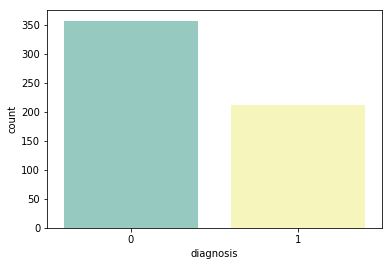

In [54]:
ax = sns.countplot(y,label="Count", palette="Set3")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [55]:
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The description of the features show that the diverge between features values so we need to normalize ore features

## Visualization

 we want to observe all correlation between features so i will use  heatmap  plot method.

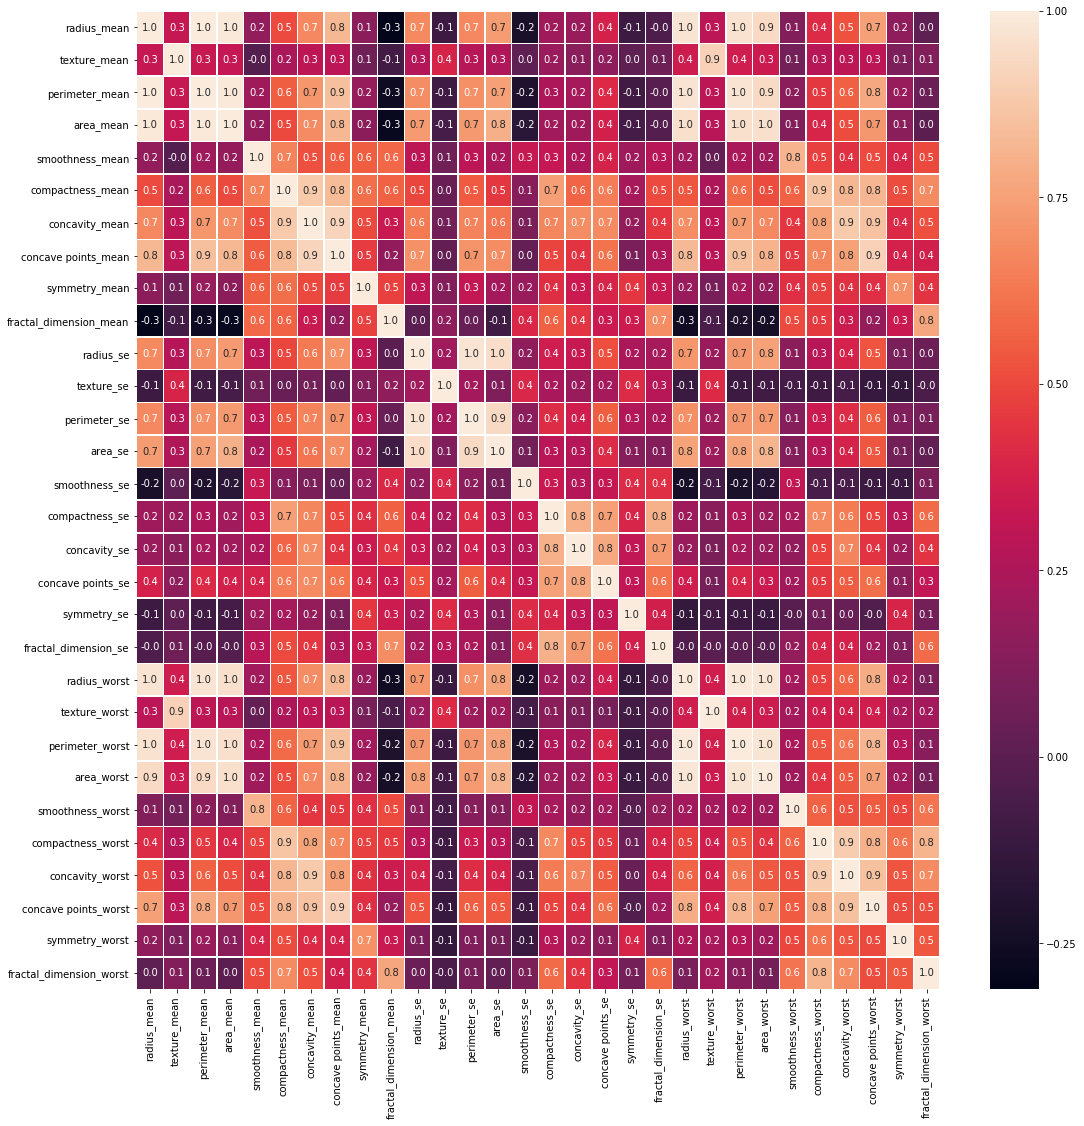

In [56]:

#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

The  heat map figure  show that( radius_mean, perimeter_mean and area_mean) are correlated with each other so we will choose  {area_mean}.(Compactness_mean, concavity_mean and concave points_mean) are correlated with each other so will choose {concavity_mean}.and  from (radius_se, perimeter_se and area_se) will  use {area_se}. (radius_worst, perimeter_worst , area_worst) are correlated so I wil use {area_worst}. (Compactness_worst, concavity_worst and concave points_worst) so I  will use {concavity_worst}.( Compactness_se, concavity_se and concave points_se )so I will use {concavity_se}. (texture_mean and texture_worst) are correlated and I  will use{ texture_mean}.( area_worst and area_mean} are correlated, I wil use {area_mean}.

In [57]:
drop_features = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
n_features = features.drop(drop_features,axis = 1 )        
n_features.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [58]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
features = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

features_log_minmax_transform = pd.DataFrame(data = data)
features_log_minmax_transform[features] = scaler.fit_transform(data[features])

# Show an example of a record with scaling applied
new_features=features_log_minmax_transform.drop(z,axis = 1)
display(new_features.head(n = 5))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [59]:
drop_features = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
n_features = new_features.drop(drop_features,axis = 1 )        
n_features.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0.022658,0.363733,0.593753,0.703140,0.686364,0.605518,0.120469,0.273811,0.159296,0.135682,0.311645,0.183042,0.601136,0.568610,0.598462,0.418864
1,0.272574,0.501591,0.289880,0.203608,0.379798,0.141323,0.082589,0.125660,0.119387,0.046970,0.084539,0.091110,0.347553,0.192971,0.233590,0.222878
2,0.390260,0.449417,0.514309,0.462512,0.509596,0.211247,0.094303,0.162922,0.150831,0.096768,0.205690,0.127006,0.483590,0.359744,0.403706,0.213433
3,0.360839,0.102906,0.811321,0.565604,0.776263,1.000000,0.175875,0.038155,0.251453,0.142955,0.728148,0.287205,0.915472,0.548642,1.000000,0.773711
4,0.156578,0.489290,0.430351,0.463918,0.378283,0.186816,0.093065,0.163688,0.332359,0.143636,0.136179,0.145800,0.437364,0.319489,0.157500,0.142595


### feature selection

 we will use SelectKBest that removes all but the k highest scoring features. 

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best 6 features
select_feature = SelectKBest(chi2, k=6).fit(X_train, y_train)
print(' high Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

 high Score list: [ 0.29005153  0.02919583  0.00093519  0.12077301  0.0411674   0.32246045]
Feature list: Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_worst', 'symmetry_worst'],
      dtype='object')


In [61]:
drop_sfeatures = ['smoothness_mean','symmetry_mean', 'fractal_dimension_mean','texture_se','smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst','fractal_dimension_worst']
s_features = n_features.drop(drop_sfeatures,axis = 1 )        
s_features.head()


,texture_mean,area_mean,concavity_mean,area_se,concavity_worst,symmetry_worst
0,0.022658,0.363733,0.703140,0.273811,0.568610,0.598462
1,0.272574,0.501591,0.203608,0.125660,0.192971,0.233590
2,0.390260,0.449417,0.462512,0.162922,0.359744,0.403706
3,0.360839,0.102906,0.565604,0.038155,0.548642,1.000000
4,0.156578,0.489290,0.463918,0.163688,0.319489,0.157500


### Shuffle and Split Data

In [62]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(s_features, 
                                                   y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 398 samples.
Testing set has 171 samples.


In [37]:
print(y)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


## DecisionTreeClassifier


In [64]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
# Import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictions_test = dtc.predict(X_test)
predictions_train = dtc.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test = accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=0.5)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=0.5)
#print results
print('accuracy on test set:',results_acc_test )
print(' F-score on the test:',results_f_test)

accuracy on test set: 0.912280701754
 F-score on the test: 0.854700854701


In [66]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
# Import AdaBoostClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
AD =AdaBoostClassifier(random_state=1)
AD.fit(X_train,y_train)
predictions_test = AD.predict(X_test)
predictions_train = AD.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test = accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=0.5)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=0.5)
#print results
print('accuracy on test set:',results_acc_test)
print(' F-score on the test:',results_f_test)

accuracy on test set: 0.941520467836
 F-score on the test: 0.906344410876


In [67]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
# Import LogisticRegression Classifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#initalize  LogisticRegression model
lg =LogisticRegression(random_state=1)
lg.fit(X_train,y_train)
predictions_test = lg.predict(X_test)
predictions_train = lg.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test= accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=0.5)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=0.5)
#print results
print('accuracy on test set:',results_acc_test)
print(' F-score on the test:',results_f_test)


accuracy on test set: 0.906432748538
 F-score on the test: 0.886287625418


C:\Users\shaimaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
# Import SVC Classifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
#initalize svm model
sv = SVC(random_state=1)
sv.fit(X_train,y_train)
predictions_test = sv.predict(X_test)
predictions_train = sv.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test = accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=0.5)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=0.5)
#print results
print('accuracy on test set:',results_acc_test)
print(' F-score on the test:',results_f_test)

accuracy on test set: 0.906432748538
 F-score on the test: 0.879478827362


C:\Users\shaimaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [69]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
# Import KNeighbors Classifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)
predictions_test = classifier_knn.predict(X_test)
predictions_train = classifier_knn.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test = accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=0.5)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=0.5)
#print results
print('accuracy on test set:',results_acc_test)
print(' F-score on the test:',results_f_test)

accuracy on test set: 0.923976608187
 F-score on the test: 0.8934169279
